In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip gdrive/My\ Drive/Datasets/LWF_DATASET/lfw.zip

Streaming output truncated to the last 5000 lines.
  inflating: lfw/lfw/Paige_Fitzgerald/Paige_Fitzgerald_0001.jpg  
   creating: lfw/lfw/Pak_Gil_Yon/
  inflating: lfw/lfw/Pak_Gil_Yon/Pak_Gil_Yon_0001.jpg  
   creating: lfw/lfw/Pamela_Anderson/
  inflating: lfw/lfw/Pamela_Anderson/Pamela_Anderson_0001.jpg  
  inflating: lfw/lfw/Pamela_Anderson/Pamela_Anderson_0002.jpg  
  inflating: lfw/lfw/Pamela_Anderson/Pamela_Anderson_0003.jpg  
  inflating: lfw/lfw/Pamela_Anderson/Pamela_Anderson_0004.jpg  
  inflating: lfw/lfw/Pamela_Anderson/Pamela_Anderson_0005.jpg  
   creating: lfw/lfw/Pamela_Melroy/
  inflating: lfw/lfw/Pamela_Melroy/Pamela_Melroy_0001.jpg  
   creating: lfw/lfw/Paola_Espinoza/
  inflating: lfw/lfw/Paola_Espinoza/Paola_Espinoza_0001.jpg  
   creating: lfw/lfw/Paradorn_Srichaphan/
  inflating: lfw/lfw/Paradorn_Srichaphan/Paradorn_Srichaphan_0001.jpg  
  inflating: lfw/lfw/Paradorn_Srichaphan/Paradorn_Srichaphan_0002.jpg  
  inflating: lfw/lfw/Paradorn_Srichaphan/Paradorn_Sric

 gdrive/My\ 'Shared with me'/Datasets/LWF_DATASET/lfw.zip

In [ ]:
!unzip "/content/gdrive/MyDrive/Datasets (1)/LWF_DATASET/lfw.zip"

unzip:  cannot find or open /content/gdrive/MyDrive/Datasets (1)/LWF_DATASET/lfw.zip, /content/gdrive/MyDrive/Datasets (1)/LWF_DATASET/lfw.zip.zip or /content/gdrive/MyDrive/Datasets (1)/LWF_DATASET/lfw.zip.ZIP.


In [ ]:
!pip install face_recognition

In [ ]:
import os
import cv2
import face_recognition

In [ ]:
path_original_lfw='./lfw/lfw'
path_cropped_lfw='./gdrive/MyDrive/Datasets/Cropped_lfw_correct'
if not os.path.isdir(path_cropped_lfw):
  os.mkdir(path_cropped_lfw)

In [ ]:
imgs_found_more_than_one_face=[]

for dir in os.listdir(path_original_lfw):
  
  #path_to_dir=specific image folder
  path_to_dir=os.path.join(path_original_lfw,dir)
  
  #path_to_dir_cropped= specific image folder after crop
  path_to_dir_cropped=os.path.join(path_cropped_lfw,dir)
  
  if not os.path.isdir(path_to_dir_cropped):
    os.mkdir(path_to_dir_cropped)

  for img in os.listdir(path_to_dir):
    img_path= os.path.join(path_original_lfw,dir,img)

    cv_img = cv2.imread(img_path)
    cv_img_colored = cv2.cvtColor(cv_img, cv2.COLOR_RGB2BGR)
    face_locations = face_recognition.face_locations(cv_img_colored,model="cnn")

    print(f"Found {len(face_locations)} faces in {img_path}")
    if len(face_locations)>1:
      dic={}
      dic['image']=img_path
      dic['face-points']=face_locations
      imgs_found_more_than_one_face.append(dic)
    else:
      for face in face_locations:
        top,right,bottom,left=face
        cropped_img=cv_img[top:bottom,left:right]
        save_file_path=os.path.join(path_cropped_lfw,dir,img)
        cv2.imwrite(save_file_path, cropped_img)
      print(f"File saved to {save_file_path}\n")


Streaming output truncated to the last 5000 lines.
File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/Daniel_Barenboim/Daniel_Barenboim_0001.jpg

Found 2 faces in ./lfw/lfw/Jane_Russell/Jane_Russell_0001.jpg
Found 1 faces in ./lfw/lfw/Mike_Easley/Mike_Easley_0001.jpg
File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/Mike_Easley/Mike_Easley_0001.jpg

Found 1 faces in ./lfw/lfw/Tatsuya_Fuji/Tatsuya_Fuji_0001.jpg
File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/Tatsuya_Fuji/Tatsuya_Fuji_0001.jpg

Found 1 faces in ./lfw/lfw/Enos_Slaughter/Enos_Slaughter_0001.jpg
File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/Enos_Slaughter/Enos_Slaughter_0001.jpg

Found 1 faces in ./lfw/lfw/Yasar_Yakis/Yasar_Yakis_0002.jpg
File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/Yasar_Yakis/Yasar_Yakis_0002.jpg

Found 2 faces in ./lfw/lfw/Yasar_Yakis/Yasar_Yakis_0003.jpg
Found 1 faces in ./lfw/lfw/Yasar_Yakis/Yasar_Yakis_0001.jpg
File saved to ./gdrive/MyDrive/

In [ ]:
# (top, right, bottom, left)
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def plotBBs(img,boxes):
  img = cv2.imread(img)
  img = cv2.cvtColor(img,  cv2.COLOR_RGB2BGR)
  print(img.shape)
  
  centreOfImg=(250//2,250//2)
  print(centreOfImg)
  
  centreOfBoxes=[]
  
  for box in boxes:
    top,right,bottom,left= box
    centreOfBoxes.append( ((left+(right-left)//2) , top+(bottom-top)//2))

  fig, ax = plt.subplots(figsize = (6,9))
  ax.imshow(img)
  for i,bx in enumerate(boxes):
    top,right,bottom,left= bx
    ax.add_patch(patches.Rectangle(  ( left,top ) , right-left  , bottom-top , fill=False, edgecolor='red', lw=2))
    plt.plot( centreOfBoxes[i][0],centreOfBoxes[i][1], marker="v",color="white")
  plt.plot( centreOfImg[0],centreOfImg[1], marker="v",color="green"  )


(250, 250, 3)
(125, 125)


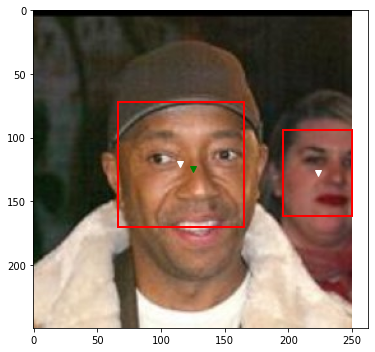

In [ ]:
for img in imgs_found_more_than_one_face:
  plotBBs(img['image'],img['face-points'])
  break

In [ ]:
def euclidDistance(pt1,pt2):
  x1,y1=pt1
  x2,y2=pt2
  return (x2-x1)*(x2-x1)+(y2-y1)*(y2-y1)


def findBestBB(img,boxes):
  img = cv2.imread(img)
  img = cv2.cvtColor(img,  cv2.COLOR_RGB2BGR)
  
  centreOfImg=(250//2,250//2)
  
  minInd=-1
  minDis=1000000000
  for i,box in enumerate(boxes):
    top,right,bottom,left= box
    centreOfBox= ((left+(right-left)//2) , top+(bottom-top)//2)
    euDis= euclidDistance(centreOfImg,centreOfBox)

    if euDis<minDis:
      minInd=i
      minDis=euDis
  return boxes[minInd]


In [ ]:
final_images_with_one_BB=[]

for img in imgs_found_more_than_one_face:

  bestBB=findBestBB(img['image'],img['face-points'])

  dic={}
  dic['image']=img['image']
  dic['face-points']=[bestBB]

  final_images_with_one_BB.append(dic)


(250, 250, 3)
(125, 125)
(250, 250, 3)
(125, 125)
(250, 250, 3)
(125, 125)
(250, 250, 3)
(125, 125)
(250, 250, 3)
(125, 125)
(250, 250, 3)
(125, 125)
(250, 250, 3)
(125, 125)
(250, 250, 3)
(125, 125)
(250, 250, 3)
(125, 125)
(250, 250, 3)
(125, 125)


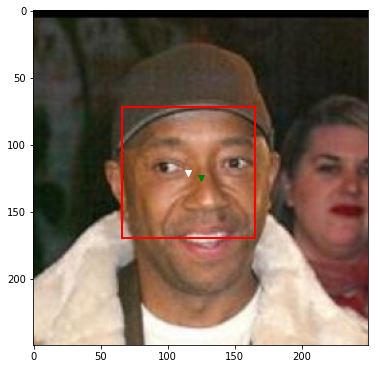

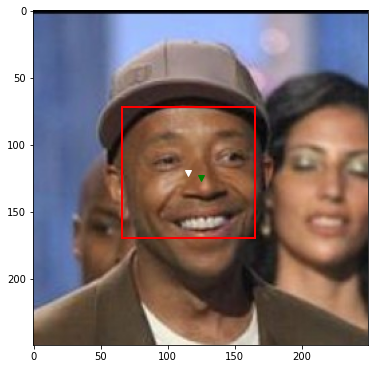

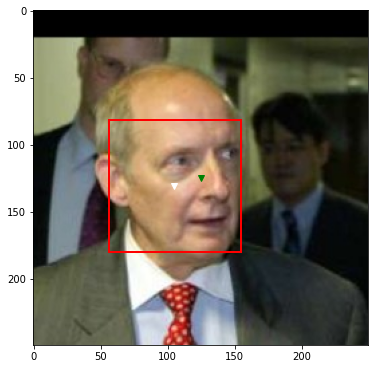

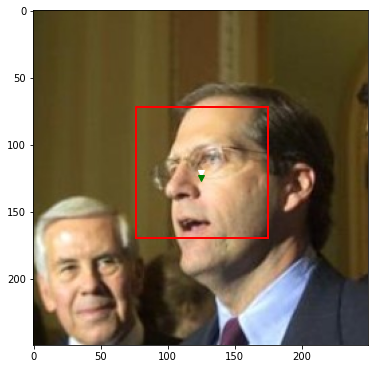

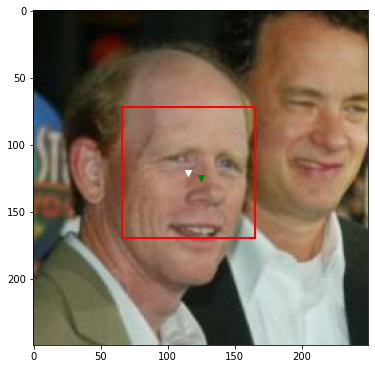

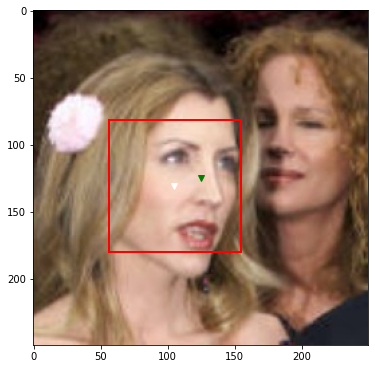

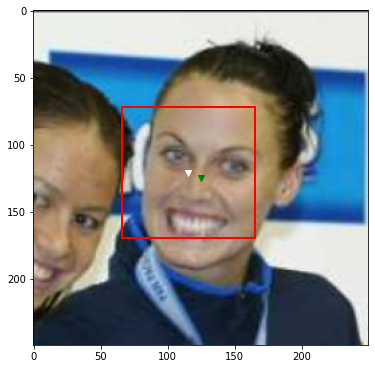

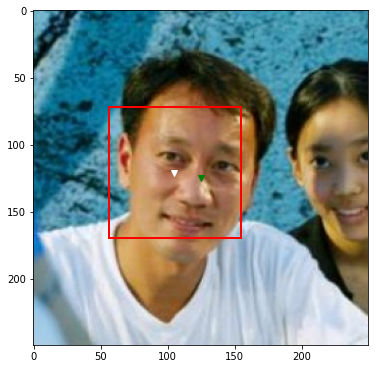

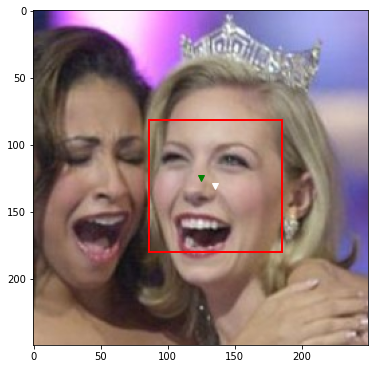

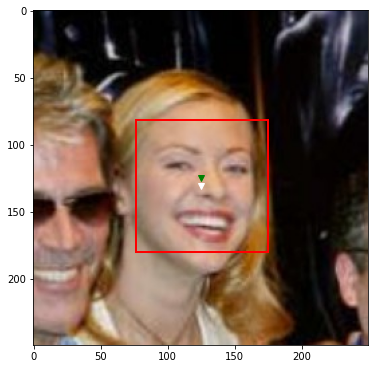

In [ ]:
cnt=0
for img in final_images_with_one_BB:
  
  plotBBs(img['image'],img['face-points'])
  
  cnt+=1
  if cnt>9:
    break

In [ ]:
path_cropped_lfw='./gdrive/MyDrive/Datasets/Cropped_lfw_correct'

for img in final_images_with_one_BB:
    face=img['face-points'][0]
    img_path=img['image']

    top,right,bottom,left=face
    cv_img = cv2.imread(img_path)
    cv_img_colored = cv2.cvtColor(cv_img, cv2.COLOR_RGB2BGR)
    cropped_img=cv_img[top:bottom,left:right]

    img_name= img_path.split('/')[-1]
    dir_name= img_path.split('/')[-2]
    if not os.path.isdir(os.path.join(path_cropped_lfw,dir_name)):
      os.mkdir(os.path.join(path_cropped_lfw,dir_name))

    save_file_path=os.path.join(path_cropped_lfw,dir_name,img_name)
    cv2.imwrite(save_file_path, cropped_img)

    print(f"File saved to {save_file_path}\n")

File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/Russell_Simmons/Russell_Simmons_0005.jpg

File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/Russell_Simmons/Russell_Simmons_0003.jpg

File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/Donald_Keyser/Donald_Keyser_0001.jpg

File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/John_Sununu/John_Sununu_0001.jpg

File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/Ron_Howard/Ron_Howard_0001.jpg

File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/Heather_Mills/Heather_Mills_0002.jpg

File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/Amanda_Beard/Amanda_Beard_0002.jpg

File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/Michael_Chang/Michael_Chang_0001.jpg

File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/Katie_Harman/Katie_Harman_0002.jpg

File saved to ./gdrive/MyDrive/Datasets/Cropped_lfw_correct/Kristanna_Loken/Kristanna_Loken_0003.jpg

File saved to ./gdrive

In [ ]:
# path_datasets= './gdrive/MyDrive/Datasets/'
# if not os.path.isdir( os.path.join(path_datasets,'Cropped_many' ) ):
#   os.mkdir(os.path.join(path_datasets,'Cropped_many' ))

In [ ]:
# cnt=0
# for img_dic in imgs_found_more_than_one_face:
#   cnt+=1
#   cv_img = cv2.imread(img_dic)
#   cv_img_colored = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)  #COLOR_BGR2RGB
#   splitting= img_dic.split('/')
#   save_file_path= os.path.join(path_datasets,'Cropped_many',splitting[-1])
#   cv2.imwrite(save_file_path, cv_img_colored)
#   print(f"Saved image to {save_file_path} --- {cnt}/1590")
  

In [ ]:
# print(length)

13233


In [ ]:
# finding absent images from newly created cropped correct folder

absent_img=[]
cnt=0
for dir in os.listdir('./lfw/lfw'):
  for img in os.listdir(os.path.join('./lfw/lfw',dir)):
    cnt+=1
    exist=os.path.isfile( os.path.join( path_cropped_lfw,dir,img ) )
    if not exist:
      absent_img.append(os.path.join( path_cropped_lfw,dir,img ))
  print(f"{cnt}/{length} done" )


Streaming output truncated to the last 5000 lines.
1488/13233 done
1489/13233 done
1490/13233 done
1494/13233 done
1495/13233 done
1496/13233 done
1497/13233 done
1502/13233 done
1503/13233 done
1504/13233 done
1505/13233 done
1507/13233 done
1509/13233 done
1510/13233 done
1513/13233 done
1515/13233 done
1517/13233 done
1518/13233 done
1519/13233 done
1520/13233 done
1521/13233 done
1522/13233 done
1550/13233 done
1551/13233 done
1552/13233 done
1553/13233 done
1561/13233 done
1562/13233 done
1563/13233 done
1567/13233 done
1568/13233 done
1573/13233 done
1575/13233 done
1576/13233 done
1578/13233 done
1580/13233 done
1581/13233 done
1582/13233 done
1583/13233 done
1584/13233 done
1585/13233 done
1586/13233 done
1587/13233 done
1588/13233 done
1589/13233 done
1595/13233 done
1620/13233 done
1621/13233 done
1622/13233 done
1623/13233 done
1625/13233 done
1642/13233 done
1643/13233 done
1644/13233 done
1645/13233 done
1647/13233 done
1648/13233 done
1649/13233 done
1650/13233 done
1652/

In [ ]:
print(f"{len(absent_img)} images not found!")

11643 images not found!


In [ ]:
print(absent_img)

['./gdrive/MyDrive/Datasets/Cropped_lfw/Jeff_Feldman/Jeff_Feldman_0001.jpg']


In [ ]:
os.path.isfile('./lfw/lfw/Jeff_Feldman/Jeff_Feldman_0001.jpg')

True

In the below image, face was not detected by face_recognition library XD. Hence, I cropped it manually and add it to the folder.


In [ ]:
from google.colab.patches import cv2_imshow

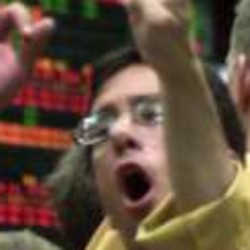

Found 0 faces in ./lfw/lfw/Jeff_Feldman/Jeff_Feldman_0001.jpg 


In [ ]:

cv_img = cv2.imread('./lfw/lfw/Jeff_Feldman/Jeff_Feldman_0001.jpg')
cv2_imshow(cv_img)
cv_img_colored = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
face_locations = face_recognition.face_locations(cv_img_colored,model="cnn")

print(f"Found {len(face_locations)} faces in ./lfw/lfw/Jeff_Feldman/Jeff_Feldman_0001.jpg ")

for face in face_locations:
  top,right,bottom,left=face
  cropped_img=cv_img[top:bottom,left:right]
  save_file_path='./gdrive/MyDrive/Datasets/Cropped_lfw/Jeff_Feldman/Jeff_Feldman_0001.jpg'
  cv2.imwrite(save_file_path, cropped_img)


Checking if ./lfw/lfw and cropped_lfw are same

In [ ]:
absent_img=[]
cnt=0
for dir in os.listdir('./lfw/lfw'):
  for img in os.listdir(os.path.join('./lfw/lfw',dir)):
    cnt+=1
    exist=os.path.isfile( os.path.join( path_cropped_lfw,dir,img ) )
    if not exist:
      absent_img.append(os.path.join( path_cropped_lfw,dir,img ))
  print(f"{cnt}/{length} done" )

In [ ]:
print(f"{len(absent_img)} images not found!")
print(absent_img)

0 images not found!
[]


DONE : )